TypeError: Input z must be 2D, not 1D

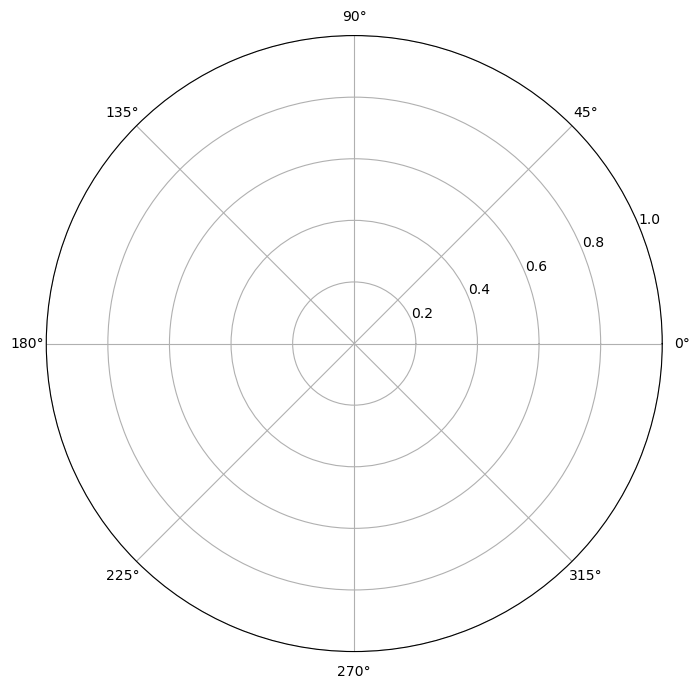

In [1]:
import matplotlib.pyplot as plt
import numpy as np

num_points = 100
theta = np.linspace(0, 2 * np.pi, num_points)
r = np.linspace(0, 1, num_points)  # This represents the radial distance (0 to 1)

# Generate sample pressure data (replace with actual data)
pressure_data = [117, 127, 135, 206, 243, 277, 306, 329, 349, 360, 364] #GPa

# Calculate temperature data based on the geothermal gradient
geothermal_gradient = 1 / 32  # 1°C per 32 meters
depth_data = np.linspace(0, 10000, num_points)  # Depth from the surface (0 to 10 km)
temperature_data = geothermal_gradient * depth_data

# Create a circular plot for pressure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
circular_pressure = ax.contourf(theta, r, pressure_data, cmap='coolwarm', levels=20)
plt.colorbar(circular_pressure, label='Pressure (hPa)')
plt.title('Earth Pressure Gradient')
plt.show()

# Create a circular plot for temperature
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
# Reshape temperature_data to match the shape of pressure_data
temperature_data_reshaped = np.tile(temperature_data, (num_points, 1))
circular_temperature = ax.contourf(theta, r, temperature_data_reshaped, cmap='coolwarm', levels=20)
plt.colorbar(circular_temperature, label='Temperature (°C)')
plt.title('Earth Temperature Gradient')
plt.show()


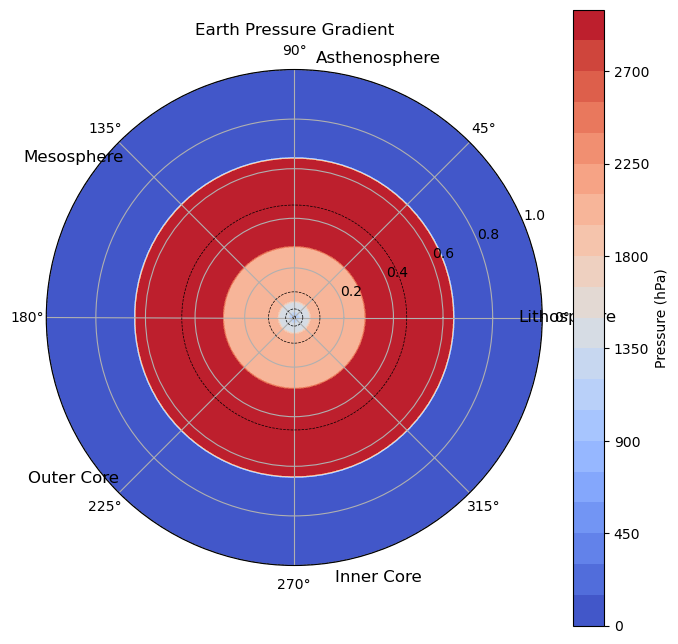

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the boundaries and properties of Earth's layers
layer_boundaries = [0, 35, 220, 660, 2890, 6371]  # Depth boundaries in km
layer_labels = ['Lithosphere', 'Asthenosphere', 'Mesosphere', 'Outer Core', 'Inner Core']
layer_colors = ['lightgreen', 'lightblue', 'lightyellow', 'lightsalmon', 'lightgray']
layer_pressure_values = [1000, 1200, 1500, 2000, 3000]  # Pressure values for each layer in hPa

# Sample pressure and temperature data (replace with real data)
# In practice, you should obtain real-world data.
num_points = 100
theta = np.linspace(0, 2 * np.pi, num_points)
r = np.linspace(0, 1, num_points)  # This represents the radial distance (0 to 1)

# Generate sample pressure data for each layer
pressure_data = np.zeros((num_points, num_points))

for i in range(len(layer_boundaries) - 1):
    depth_start = layer_boundaries[i]
    depth_end = layer_boundaries[i + 1]
    pressure_value = layer_pressure_values[i]

    # Set pressure values within the depth range of the layer
    depth_mask = (depth_data >= depth_start) & (depth_data < depth_end)
    pressure_data[depth_mask, :] = pressure_value

# Create a circular plot for pressure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
circular_pressure = ax.contourf(theta, r, pressure_data, cmap='coolwarm', levels=20)
plt.colorbar(circular_pressure, label='Pressure (hPa)')

# Add layer boundaries as concentric circles
for boundary in layer_boundaries[1:]:
    radius = boundary / max(layer_boundaries)
    ax.plot(theta, radius * np.ones_like(theta), color='black', linestyle='--', lw=0.5)

# Add labels for Earth's layers
for i, label in enumerate(layer_labels):
    angle = i * 2 * np.pi / len(layer_labels)
    ax.text(angle, 1.1, label, fontsize=12, ha='center', va='center', transform=ax.transData)

plt.title('Earth Pressure Gradient')
plt.show()
